In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from ast import literal_eval
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('data_hcm_final.csv')

C:\Users\lolfa\AppData\Local\Temp\ipykernel_13588\1000905438.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data_hcm_final.csv')


In [ ]:
def preProccesing(x):
    x = literal_eval(x) if not pd.isna(x) else x
    return x

In [ ]:
df['categories'] = df['categories'].apply(preProccesing)
df['cuisines'] = df['cuisines'].apply(preProccesing)

## Liệu mọi cửa hàng điều hỗ trợ thức ăn mang đi

<AxesSubplot: title={'center': 'Phân bố cửa hàng có dịch vụ giao đồ ăn'}, ylabel='IsDelivery'>

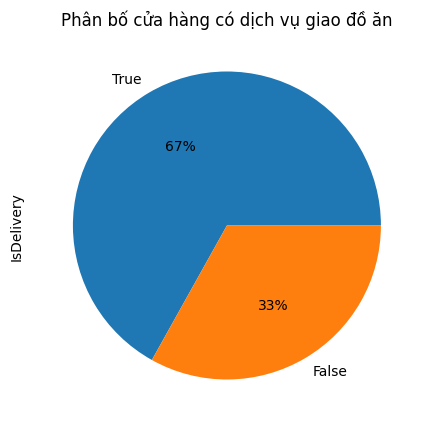

In [ ]:
titles = 'Phân bố cửa hàng có dịch vụ giao đồ ăn'
df['IsDelivery'].value_counts().plot.pie(autopct='%1.0f%%', figsize = (15, 5), title = titles)

Nhận xét: 
- Có  tới 2/3 số cửa hàng ở TP.HCM trên foody là có dịch vụ giao đồ ăn nhanh, tỉ lệ này là khá cao khi mà Foody là nền tảng review các quán ăn, nhà hàng, ... chứ không phải nền tảng đặt đồ ăn nhanh cho người tiêu dùng.

## Loại phong cách ẩm thực nào đang được chiếm ưu thế và được đánh giá cao ở HCM

In [ ]:
cuisines_top_list = []
for value in df[df['AvgScore'] == 10]['cuisines'].values:
    if type(value) == list:
        cuisines_top_list.extend(value)
    else:
        cuisines_top_list.append(np.NaN)

cuisines_df = pd.DataFrame(cuisines_top_list, columns = ['cuisines'])

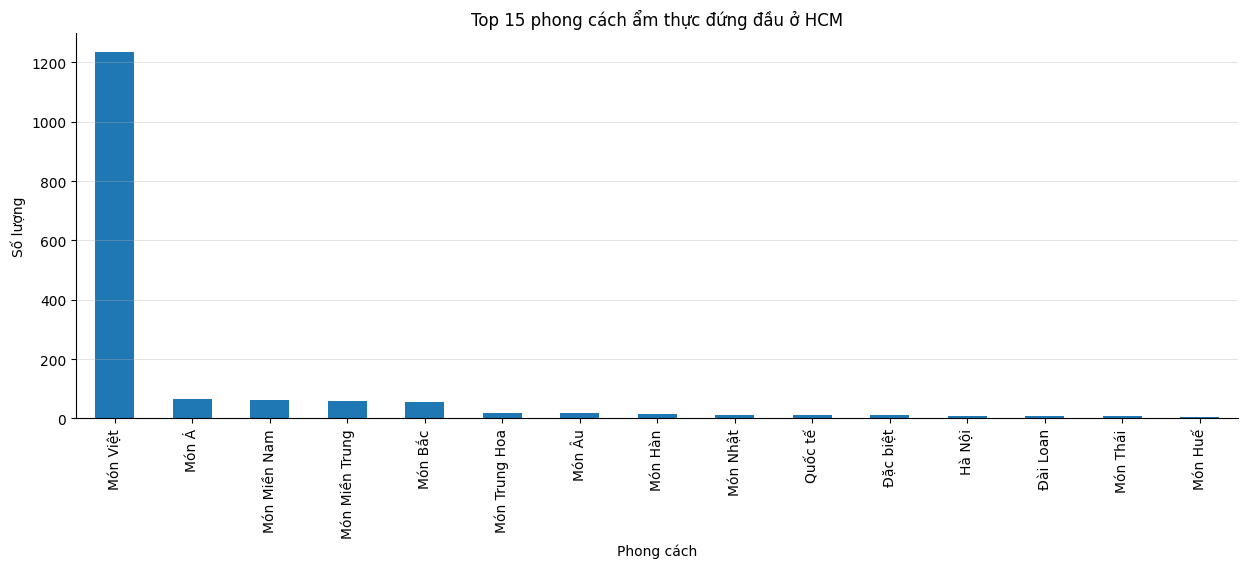

In [ ]:
fig, ax = plt.subplots()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

titles = 'Top 15 phong cách ẩm thực đứng đầu ở HCM'

ax = cuisines_df['cuisines'].value_counts()[0:15].plot.bar(figsize = (15,5), title = titles, xlabel = 'Phong cách', ylabel = 'Số lượng')
ax.yaxis.grid(linestyle = '-', linewidth= 0.5, alpha = 0.5)

Nhận xét:
- Mặc dù đa dạng về phong cách ẩm thực nhưng các món Việt, cụ thể hơn là các món Bắc, Trung, Nam hoặc đặc sản từng tỉnh luôn là các phong cách ẩm thực được yêu thích nhất
- Một vài phong cách ẩm thực châu Á mà người việt cũng ưu thích là: Món Trung Hoa, Món Hàn, Món Nhật, Món Đài và Thái cũng chiếm phần mặc dù không nhiều
- Phong cách ẩm thực châu Âu chiếm rất thấp nếu so với ẩm thực châu Á

Kết luận:
- Người Việt Nam chuộng các món ăn vốn quen thuộc và cũng có lượng người tiếp cận các món ăn Châu Á ngoài Việt Nam
- Phong cách ẩm thực châu Âu khó chiếm vị thế ở thị trường Châu Á như Việt Nam 

## Xu hướng mô hình dịch vụ ở HCM

In [ ]:
categories_list = []
for value in df['categories'].values:
    if type(value) == list:
        categories_list.extend(value)
    else:
        categories_list.append(np.NaN)

df_categories = pd.DataFrame(categories_list, columns = ['Categories'])

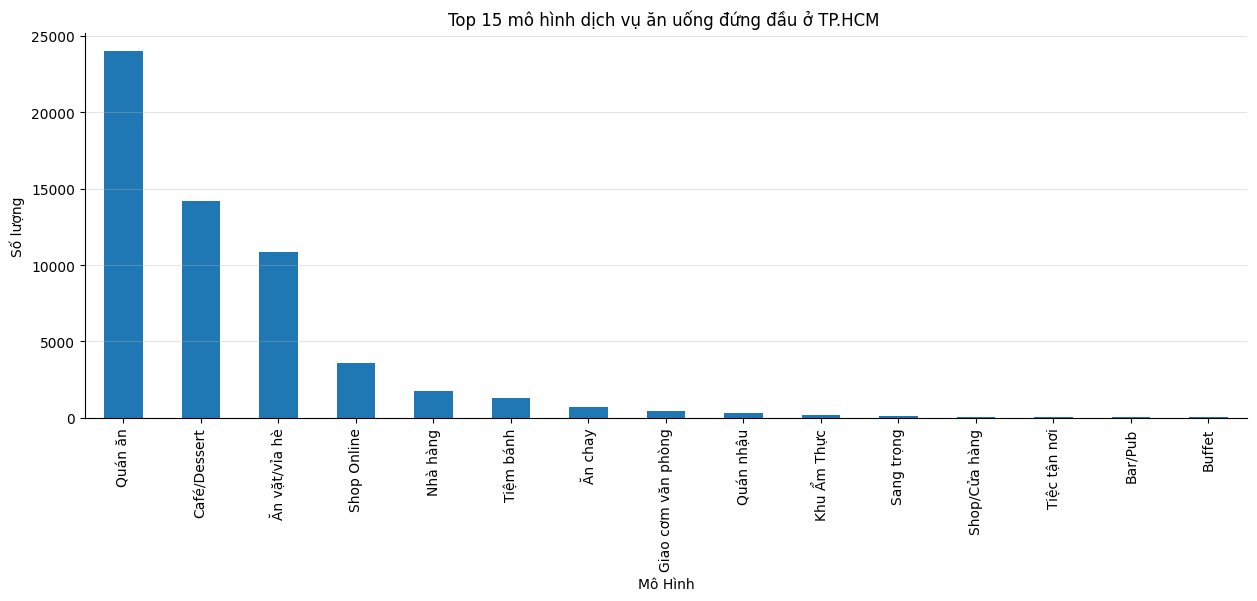

In [ ]:
fig, ax = plt.subplots()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

titles = 'Top 15 mô hình dịch vụ ăn uống đứng đầu ở TP.HCM '

ax = df_categories['Categories'].value_counts()[0:15].plot.bar(figsize = (15,5), title = titles, xlabel = 'Mô Hình', ylabel = 'Số lượng')
ax.yaxis.grid(linestyle = '-', linewidth= 0.5, alpha = 0.5)

Nhận xét:
- Phần lớn mô hình dịch vụ ăn uống ở thành phố HCM là các dịch vụ ở mức trung bình bao gồm: Quán ăn, Cafe, Ăn vặt/Vỉa hè và Shop Online. Điều này có lý giải được bởi mô hình Giao đồ ăn thường phục vụ cho nhóm nhà hàng ở mức trung bình, phục vụ cho nhóm đối tượng lớn là nhân viên, người trẻ.
- Mô hình dịch vụ sang trọng hơn nhưng lại ít phổ biến hơn bao gồm: Nhà hàng, Tiệm bánh và Ăn chay. Với việc các mô hình này có tính quy mô hơn quán ăn hoặc chỉ phục vụ một số lượng món nhất định cho nên các mô hình này có số lượng không lớn hơn nhóm dịch vụ trên là điều dễ hiểu.
- Các dịch vụ chiếm số lượng thấp bao gồm: Quán nhậu, Khu Ẩm thực, Sang Trọng, Buffet, .... Có thể nhận ra đây là các nhóm dịch vụ đánh vào các đối tượng là khách hàng sử dụng dịch vụ trực tiếp nên số lượng cực kỳ thấp